In [ ]:
# Import dipendeze

In [23]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import sys

In [ ]:
# Caricamento dati

In [3]:
# Importa i dati dal file excel
#Modifica la precisione nella visualizzazione delle cifre
pd.options.display.precision = 10

#Legge il csv e lo stampa
df_DatiSensori = pd.read_excel('Dati_gruppo1.xlsx')

In [ ]:
# Creazione di un dataframe di lavoro

In [24]:
# Mostra tutte le colonne
# pd.set_option('display.max_rows', None)# df_DatiSensori = df_DatiSensori.drop_duplicates()

# crea una copia del dataset
df_Dati = df_DatiSensori.copy()
df_Dati

,postazione,Data,TRS_ppb,TRS_stato,VOC_ppm,VOC_stato,C6H6_ug/m3,C6H6_stato,H2S_ug/m3,H2S_stato,H2SJ_ug/m3,H2SJ_stato,PIDVOC_ppb,PIDVOC_stato
0,ATM05_01479,2021-04-12 00:00:00,2.0000000000,K,0.0,K,0.3000000119,K,0.0000000000,K,0.0,K,44.5999984741,K
1,ATM05_01479,2021-04-12 00:05:00,0.0000000000,K,0.0,K,0.2000000030,K,0.2000000030,K,0.0,K,44.0000000000,K
2,ATM05_01479,2021-04-12 00:10:00,0.0000000000,K,0.0,K,0.2000000030,K,1.7000000477,K,0.0,K,44.2000007629,K
3,ATM05_01479,2021-04-12 00:15:00,11.8999996185,K,0.0,K,0.2000000030,K,1.8999999762,K,0.0,K,44.4000015259,K
4,ATM05_01479,2021-04-12 00:20:00,26.1000003815,K,0.0,K,0.2000000030,K,2.5000000000,K,0.0,K,40.7999992371,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153211,ATM14_01486,NaT,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND
153212,ATM14_01486,NaT,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND
153213,ATM14_01486,NaT,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND
153214,ATM14_01486,NaT,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND,NaN,ND


In [ ]:
# Pulizia dataset

In [43]:
#Rinomina le colonne con carattersi speciali e assegna la soglia 
df_Dati.rename(columns = {'C6H6_ug/m3':'C6H6_ug_m3', 'H2S_ug/m3':'H2S_ug_m3', 'H2SJ_ug/m3':'H2SJ_ug_m3'}, inplace = True)
theshold = 24

In [26]:
#Restituisce la lista con i valori della colonna e assegna il valore NaN ai theshold-valori consescutivi
def find_repeats(L, required_number, num_repeats, stop_after_match=False):
  idx = 0
  while idx < len(L):
    if [required_number]*num_repeats == L[idx:idx+num_repeats]:
      L[idx:idx+num_repeats] = [np.nan]*num_repeats
      idx += num_repeats
      if stop_after_match:
        break
    else:
        idx += 1
  return L

In [27]:
#funzione find_fail sostituisce NaN, così evitiamo una coversione inutile
def find_fail(column, df, theshold):
  dfSensor = df[[column]]
  sensor_list = dfSensor[column].values.tolist()
  sensor_indexList = find_repeats(sensor_list, 0, theshold)
  dfSensor[column] = pd.DataFrame(sensor_indexList)
  return dfSensor

In [38]:
dfTRS = df_Dati[['postazione', 'Data']]
dfTRS['TRS_ppb'] = find_fail('TRS_ppb', df_Dati, theshold) #TRS_ppb
dfVOC = df_Dati[['postazione', 'Data']]
dfVOC['VOC_ppm'] = find_fail('VOC_ppm', df_Dati, theshold) #VOC_ppm
dfC6H6 = df_Dati[['postazione', 'Data']]
dfC6H6['C6H6_ug_m3'] = find_fail('C6H6_ug_m3', df_Dati, theshold) #C6H6_ug/m3
dfH2S = df_Dati[['postazione', 'Data']]
dfH2S['H2S_ug_m3'] = find_fail('H2S_ug_m3', df_Dati, theshold) #H2S_ug/m3
dfH2SJ = df_Dati[['postazione', 'Data']]
dfH2SJ['H2SJ_ug_m3'] = find_fail('H2SJ_ug_m3', df_Dati, theshold) #H2SJ_ug/m3
dfPIDVOC = df_Dati[['postazione', 'Data']]
dfPIDVOC['PIDVOC_ppb'] = find_fail('PIDVOC_ppb', df_Dati, theshold) #PIDVOC_ppb

C:\Users\Antonio\AppData\Local\Temp\ipykernel_18916\1014118646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSensor[column] = pd.DataFrame(sensor_indexList)
C:\Users\Antonio\AppData\Local\Temp\ipykernel_18916\1496240997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTRS['TRS_ppb'] = find_fail('TRS_ppb', df_Dati, theshold) #TRS_ppb
C:\Users\Antonio\AppData\Local\Temp\ipykernel_18916\1014118646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [60]:
# elimina i valori NaN e i valori ND
df_DatiPuliti = df_Dati[~df_Dati.TRS_stato.str.match('ND')]
df_DatiPuliti = df_Dati.dropna().reset_index(drop=True)
# df_Dati
# scrive il dataset su disco
# df_DatiPuliti.to_excel('datiPuliti.xlsx')

In [ ]:
# crea una lista con tutti gli indici degli 0 presenti nella colonna TRS_ppb del dataset
# zero_indices_list = df_DatiPuliti.index[df_DatiPuliti["TRS_ppb"] == 0].tolist()
# zero_indices_list

col_List = df_Dati.TRS_ppb.values.tolist()
indexList = find_repeats(col_List, 0, 24)
df_Dati['TRS_ppb'] = pd.DataFrame(indexList)

for indexDataFrame in range(len(df_Dati)):
  if(df_Dati.at[indexDataFrame, 'TRS_ppb'] == True):
    df_Dati.drop(indexDataFrame, inplace=True)


In [61]:
df_DatiPuliti

,postazione,Data,TRS_ppb,TRS_stato,VOC_ppm,VOC_stato,C6H6_ug_m3,C6H6_stato,H2S_ug_m3,H2S_stato,H2SJ_ug_m3,H2SJ_stato,PIDVOC_ppb,PIDVOC_stato
0,ATM05_01479,2021-04-12 00:00:00,2.0000000000,K,0.0,K,0.3000000119,K,0.0000000000,K,0.0000000000,K,44.5999984741,K
1,ATM05_01479,2021-04-12 00:05:00,0.0000000000,K,0.0,K,0.2000000030,K,0.2000000030,K,0.0000000000,K,44.0000000000,K
2,ATM05_01479,2021-04-12 00:10:00,0.0000000000,K,0.0,K,0.2000000030,K,1.7000000477,K,0.0000000000,K,44.2000007629,K
3,ATM05_01479,2021-04-12 00:15:00,11.8999996185,K,0.0,K,0.2000000030,K,1.8999999762,K,0.0000000000,K,44.4000015259,K
4,ATM05_01479,2021-04-12 00:20:00,26.1000003815,K,0.0,K,0.2000000030,K,2.5000000000,K,0.0000000000,K,40.7999992371,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,0.0000000000,K,0.0,K,0.6000000238,K,8.8999996185,K,0.3000000119,K,352.6000061035,K
140194,ATM14_01486,2021-11-28 23:40:00,0.0000000000,K,0.0,K,0.6000000238,K,8.3000001907,K,0.3000000119,K,350.6000061035,K
140195,ATM14_01486,2021-11-28 23:45:00,0.0000000000,K,0.0,K,0.6000000238,K,8.6999998093,K,0.3000000119,K,353.0000000000,K
140196,ATM14_01486,2021-11-28 23:50:00,0.0000000000,K,0.0,K,0.6000000238,K,9.1999998093,K,1.2000000477,K,352.7999877930,K


In [ ]:
# # QUERY

In [ ]:
# Query 1

In [ ]:
# query effettuata con un unico comando
# df_Benzene = df_DatiSensori.sort_values(by='C6H6_ug/m3', ascending =False)[['postazione', 'Data', 'C6H6_ug/m3']].head(100)

# creazione di un dataFrame ordinato in modo discendente per i valori di benzene
df_C6H6 = df_DatiPuliti.sort_values(by='C6H6_ug/m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di benzene
query_C6H6 = df_C6H6[['postazione', 'Data', 'C6H6_ug/m3']]
query_C6H6.head(100)

In [ ]:
# Query 2

In [ ]:
# sensore H2S

# query effettuata con un unico comando
# df_H2S = df_DatiSensori.sort_values(by='H2S_ug/m3', ascending =False)[['postazione', 'Data', 'H2S_ug/m3']].head(100)
# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2S
df_H2S = df_DatiPuliti.sort_values(by='H2S_ug/m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di acido solfidrico del sensore H2SJ
query_H2S = df_H2S[['postazione', 'Data', 'H2S_ug/m3']].head(100)
query_H2S

In [ ]:
# sensore H2SJ

# query effettuata con un unico comando
# df_H2SJ = df_DatiSensori.sort_values(by='H2SJ_ug/m3', ascending =False)[['postazione', 'Data', 'H2SJ_ug/m3']].head(100)
# creazione di un dataFrame ordinato in modo discendente per i valori di acido solfidrico del sensore H2SJ
df_H2SJ = df_DatiPuliti.sort_values(by='H2SJ_ug/m3', ascending =False).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 maggiori valori di acido solfidrico del sensore H2SJ
query_H2SJ = df_H2SJ[['postazione', 'Data', 'H2SJ_ug/m3']].head(100)
query_H2SJ

In [ ]:
# Query 3

In [ ]:
# sensore VOC

# query effettuata con un unico comando
# df_VOC = df_DatiSensori.sort_values(by='VOC_ppm', ascending =True)[['postazione', 'Data', 'VOC_ppm']].head(100)
# creazione di un dataFrame ordinato in modo discendente per i valori del sensore VOC
df_VOC = df_DatiPuliti.sort_values(by='VOC_ppm', ascending =True).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 più bassi valori del sensore VOC
query_VOC = df_VOC[['postazione', 'Data', 'VOC_ppm']].head(100)
query_VOC

In [ ]:
# sensore PIDVOC

# query effettuata con un unico comando
# df_PIDVOC = df_DatiSensori.sort_values(by='PIDVOC_ppb', ascending =True)[['postazione', 'Data', 'PIDVOC_ppb']].head(100)
# creazione di un dataFrame ordinato in modo discendente per i valori del sensore PIDVOC
df_PIDVOC = df_DatiPuliti.sort_values(by='PIDVOC_ppb', ascending =True).drop_duplicates(subset=['Data'])
# creazione di un dataFrame contenente i 100 più bassi valori del sensore PIDVOC
query_PIDVOC = df_PIDVOC[['postazione', 'Data', 'PIDVOC_ppb']].head(100)
query_PIDVOC

In [ ]:
# Query 4

In [5]:
# funzione che permette di eliminare i valori nulli, calcola la media oraria e restituisce un dataframe ordinato sull'ora
def media_oraria(df, compound ):
  df1 = df[['postazione', 'Data', compound]].copy()
  df1['Data'] = pd.to_datetime(df1['Data'])
  df1 = df1[df1[compound].notna()]
  indexName = df1[(df1[compound]==0)].index
  df1.drop(indexName, inplace = True)
  return df1, df1[['Data', compound]].resample("H", label = 'right', on = 'Data').mean()

In [56]:
df_C6H6, df_C6H6avg = media_oraria(df_DatiSensori, 'C6H6_ug/m3')
df_C6H6avg

,C6H6_ug/m3
Data,
2021-04-12 01:00:00,0.2750000053
2021-04-12 02:00:00,0.2461538498
2021-04-12 03:00:00,0.2400000036
2021-04-12 04:00:00,0.2739130476
2021-04-12 05:00:00,0.2409090948
...,...
2021-11-28 20:00:00,0.2999999989
2021-11-28 21:00:00,0.2999999989
2021-11-28 22:00:00,0.2999999989


In [ ]:
print(len(indexName))

In [ ]:
# Stampa le 50 ore con i livelli di benzene più alti
df_C6H6Max = df_C6H6avg.sort_values('C6H6_ug/m3', ascending = False).head(50)
df_C6H6Max

In [ ]:
# Stampa le 50 ore con i livelli di benzene più bassi
df_C6H6Min = df_C6H6avg.sort_values('C6H6_ug/m3', ascending = True).head(50)
df_C6H6Min

In [ ]:
#50 ore con il pù basso livello medio di benzene
df_C6H6 = df_DatiSensori[['ora','C6H6_ug/m3']].copy()
df_ore = df_C6H6.groupby('ora').mean().sort_values(['C6H6_ug/m3'], ascending =True).head(50).reset_index()
df_ore[['ora']]

In [ ]:
# Query 5

In [6]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2S
df_H2S, df_H2Savg = media_oraria(df_DatiSensori, 'H2S_ug/m3')
# df_H2Savg

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più alti
df_H2SMax= df_H2Savg.sort_values('H2S_ug/m3', ascending = False).head(50)
df_H2SMax

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2S più basso
df_H2SMin= df_H2Savg.sort_values('H2S_ug/m3', ascending = True).head(50)
df_H2SMin

In [7]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore H2SJ
df_H2SJ, df_H2SJavg = media_oraria(df_DatiSensori, 'H2SJ_ug/m3')
# df_H2SJavg

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più alti
df_H2SJMax= df_H2SJavg.sort_values('H2SJ_ug/m3', ascending = False).head(50)
df_H2SJMax

In [ ]:
# Stampa le 50 ore con i livelli di acido solfidrico del sensore H2SJ più bassi
df_H2SJMin= df_H2SJavg.sort_values('H2SJ_ug/m3', ascending = True).head(50)
df_H2SJMin

In [ ]:
# Query 6

In [41]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore VOC
df_VOC, df_VOCavg = media_oraria(df_DatiSensori, 'VOC_ppm')
df_VOCavg

,VOC_ppm
Data,
2021-04-12 01:00:00,0.2000000030
2021-04-12 02:00:00,0.2000000030
2021-04-12 03:00:00,0.2000000030
2021-04-12 04:00:00,0.2000000030
2021-04-12 05:00:00,0.2000000030
...,...
2021-11-28 20:00:00,0.2000000030
2021-11-28 21:00:00,0.2416666734
2021-11-28 22:00:00,0.2166666711


In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più alti
df_VOCMax= df_VOCavg.sort_values('VOC_ppm', ascending = False).head(50)
df_VOCMax

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore VOC più bassi
df_VOCMin= df_VOCavg.sort_values('VOC_ppm', ascending = True).head(50)
df_VOCMin

In [42]:
#Elimina i valori nulli e calcola la media oraria sul dataframe creato per il sensore PIDVOC
df_PIDVOC, df_PIDVOCavg = media_oraria(df_DatiSensori, 'PIDVOC_ppb')
df_PIDVOCavg

,PIDVOC_ppb
Data,
2021-04-12 01:00:00,75.2958326340
2021-04-12 02:00:00,73.7435896947
2021-04-12 03:00:00,70.9600000064
2021-04-12 04:00:00,74.2608698555
2021-04-12 05:00:00,75.1590911692
...,...
2021-11-28 20:00:00,132.1666666667
2021-11-28 21:00:00,130.8277769883
2021-11-28 22:00:00,127.9666655064


In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più alti
df_PIDVOCMax= df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = False).head(50)
df_PIDVOCMax

In [ ]:
# Stampa le 50 ore con i livelli di VOC del sensore PIDVOC più bassi
df_PIDVOCMin= df_PIDVOCavg.sort_values('PIDVOC_ppb', ascending = True).head(50)
df_PIDVOCMin

In [ ]:
# Creazione di un dataset per la media oraria

In [ ]:
df_MediaOraria = df_C6H6.copy()
df_MediaOraria['H2S_ug/m3'] = df_H2S['H2S_ug/m3']
df_MediaOraria['H2SJ_ug/m3'] = df_H2SJ['H2SJ_ug/m3']
df_MediaOraria['VOC_ppm'] = df_VOC['VOC_ppm']
df_MediaOraria['PIDVOC_ppb'] = df_PIDVOC['PIDVOC_ppb']
df_MediaOraria.to_excel('media_oraria.xlsx')

In [ ]:
# Query 7

In [ ]:
# Giornate con fallimenti ND
df_Fail_ND = df_DatiSensori[['Data','TRS_ppb','VOC_ppm','C6H6_ug/m3','H2S_ug/m3','H2SJ_ug/m3','PIDVOC_ppb']].copy()
df_Fail_ND['Giorno'] = pd.to_datetime(df_Fail_ND['Data'].dt.strftime('%d/%m/%Y'))
df_Fail_ND = df_Fail_ND[(df_Fail_ND['TRS_ppb'].isna()) | (df_Fail_ND['VOC_ppm'].isna()) | (df_Fail_ND['C6H6_ug/m3'].isna()) | (df_Fail_ND['H2S_ug/m3'].isna()) | (df_Fail_ND['H2SJ_ug/m3'].isna()) | (df_Fail_ND['PIDVOC_ppb'].isna())]
df_Fail_ND = df_Fail_ND.groupby('Giorno').count()
df_Fail_ND

In [ ]:
# Errato
# Serve trovare anche le righe con 24 (144)(Praticamente per 12h della stessa giornata non ha registrato) 0 che sono comunque ND.
df_Fail_0 = df_DatiSensori[['Data','TRS_ppb','VOC_ppm','C6H6_ug/m3','H2S_ug/m3','H2SJ_ug/m3','PIDVOC_ppb']].copy()
df_Fail_0['Giorno'] = pd.to_datetime(df_Fail_0['Data'].dt.strftime('%d/%m/%Y'))
df_Fail_0['TRS_ppb'].astype(float)
df_Fail_0['VOC_ppm'].astype(float)
df_Fail_0['C6H6_ug/m3'].astype(float)
df_Fail_0['H2S_ug/m3'].astype(float)
df_Fail_0['H2SJ_ug/m3'].astype(float)
df_Fail_0['PIDVOC_ppb'].astype(float)
df_Fail_0 = df_Fail_0[(df_Fail_0['TRS_ppb'] == 0) | (df_Fail_0['VOC_ppm'] == 0) | (df_Fail_0['C6H6_ug/m3']== 0) | (df_Fail_0['H2S_ug/m3']== 0) | (df_Fail_0['H2SJ_ug/m3']== 0) | (df_Fail_0['PIDVOC_ppb']== 0)]
df_Fail_0 = df_Fail_0.groupby('Giorno').count()
# df_Fail_0 = df_Fail_0[(df_Fail_0.Data >= 144)]
df_Fail_0 = df_Fail_0[(df_Fail_0.Data >= 24)]
df_Fail_0

In [ ]:
#Unisco i dati per i fallimenti(Banale union)
df_fail = pd.concat([df_Fail_ND, df_Fail_0])

In [ ]:
#3 giorni con il maggior numero di fallimenti
df_fail.sort_values(['Data'], ascending=False).head(3)

In [ ]:
#3 giorni con il minor numero di fallimenti
df_fail.sort_values(['Data'], ascending=True).head(3)

In [ ]:
# Query 8

In [ ]:
# 3 giornate con il minor numero di fallimenti (manca il calcolo dei 24 zeri consecutivi)
df_Fail = df_DatiSensori[['Data','C6H6_ug/m3']].copy()
df_Fail['Data'] = pd.to_datetime(df_Fail['Data'].dt.strftime('%d/%m/%Y'))
df_Fail['Giorno'] = df_Fail['Data']
df_Fail = df_Fail[df_Fail['C6H6_ug/m3'].isna()]
df_Fail = df_Fail[(df_Fail['C6H6_ug/m3']!='0')]
df_Fail = df_Fail.groupby('Giorno').count().sort_values('Data', ascending = True)
df_Fail.head(3)

In [ ]:
# Query 9, 10 e 11

In [48]:
# crea due liste con tutti gli inquinanti e i relativi stati
inquinanti = ['TRS_ppb','VOC_ppm','C6H6_ug/m3','H2S_ug/m3','H2SJ_ug/m3','PIDVOC_ppb']
stato_Inquinanti = ['TRS_stato','VOC_stato','C6H6_stato', 'H2S_stato','H2SJ_stato', 'PIDVOC_stato']

In [49]:
# crea un dataframe che contiene la somma dei fallimenti 
# oltre alle righe con 'ND' che indicano il fallimento nel trasmettere i dati, consideriamo fallimento
# anche la presenza consecutiva massiccia di valori 0
fails = []
df_NFails = pd.DataFrame({'Fallimenti':np.arange(6)})
df_NFails = pd.DataFrame({'Sensori':np.arange(6)})
for column in range(len(inquinanti)):
    df_Fail = df_DatiSensori[[inquinanti[column], stato_Inquinanti[column]]].copy()
    errors = df_Fail[inquinanti[column]].ne(df_Fail[inquinanti[column]].shift()).cumsum()[df_Fail[inquinanti[column]].eq(0.0)].value_counts().ge(24).sum()
    num_ND= df_Fail[stato_Inquinanti[column]].value_counts()["ND"]
    fails.append(num_ND + errors)

df_NFails['Sensori'] = inquinanti
df_NFails['Fallimenti'] = fails
df_NFails


,Sensori,Fallimenti
0,TRS_ppb,13460
1,VOC_ppm,13613
2,C6H6_ug/m3,13001
3,H2S_ug/m3,13091
4,H2SJ_ug/m3,13426
5,PIDVOC_ppb,13051


In [ ]:
# Query 9

In [ ]:
df_NFails['Dati TOT'] = len(df_DatiSensori)
df_NFails['Media'] = df_NFails['Fallimenti'].div(len(df_DatiSensori))
df_NFails

In [ ]:
# Query 10

In [ ]:
# Prende il massimo dal dataframe
df_NFails['Fallimenti'].max()

In [ ]:
# Query 11

In [ ]:
# Prende il minimo dal dataframe
df_NFails['Fallimenti'].min()

In [ ]:
# # CORRELAZIONI

In [18]:
# Funzione correlazione
def correlation(df, postazione, compound1, compound2,):
    df1 = df[df['postazione'] == postazione]
    df1.plot.scatter(x= compound1, y=compound2)
    a,b = np.polyfit(df1[compound1].to_list(), df1[compound2].to_list(), 1) #Inferiamo y =ax + b
    x1 = min(df1[compound1].to_list())
    x2 = max(df1[compound1].to_list())
    plt.plot([x1,x2], [a*x1 +b, a*x2 +b], color = 'red')
    plt.show()
    cc = np.corrcoef(df1[compound1], df1[compound2])[1,0]
    cs = df1[[compound1, compound2]].corr(method = 'spearman')
    return cc, cs.iloc[1,0]

In [ ]:
# CORRELAZIONE 1 TRA I SENSORI H2S E H2SJ NELLE VARIE POSTAZIONI

In [67]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_AcidoSolf = df_DatiPuliti[['postazione', 'Data', 'H2S_ug_m3', 'H2SJ_ug_m3']]
df_AcidoSolf = df_AcidoSolf.dropna()
df_AcidoSolf

,postazione,Data,H2S_ug_m3,H2SJ_ug_m3
0,ATM05_01479,2021-04-12 00:00:00,0.0000000000,0.0000000000
1,ATM05_01479,2021-04-12 00:05:00,0.2000000030,0.0000000000
2,ATM05_01479,2021-04-12 00:10:00,1.7000000477,0.0000000000
3,ATM05_01479,2021-04-12 00:15:00,1.8999999762,0.0000000000
4,ATM05_01479,2021-04-12 00:20:00,2.5000000000,0.0000000000
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,8.8999996185,0.3000000119
140194,ATM14_01486,2021-11-28 23:40:00,8.3000001907,0.3000000119
140195,ATM14_01486,2021-11-28 23:45:00,8.6999998093,0.3000000119
140196,ATM14_01486,2021-11-28 23:50:00,9.1999998093,1.2000000477


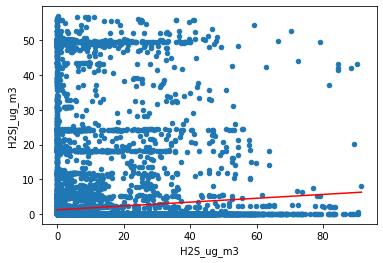

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è  0.07594690162434233
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è  0.0204889041470487


In [68]:
# correlazione per la stazione ATM05_01479
pearsonPost1, spearmanPost1= correlation(df_AcidoSolf, 'ATM05_01479', 'H2S_ug_m3', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è ', pearsonPost1)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è ', spearmanPost1)

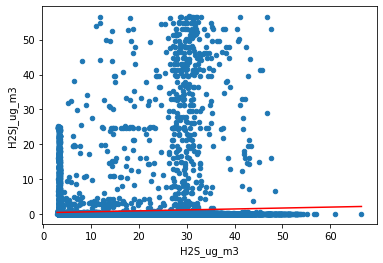

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è  0.07424772401108427
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è  -0.03060405992865737


In [69]:
# correlazione per la stazione ATM07_01480
pearsonPost2, spearmanPost2 = correlation(df_AcidoSolf, 'ATM07_01480', 'H2S_ug_m3', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è ', pearsonPost2)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è ', spearmanPost2)

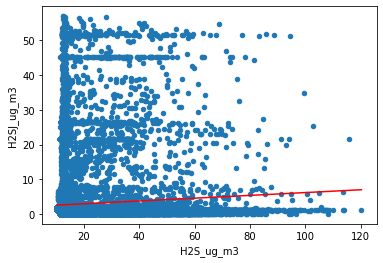

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è  0.06808761112626863
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è  -0.08060107144896163


In [70]:
# correlazione per la stazione ATM10_01481
pearsonPost3, spearmanPost3 = correlation(df_AcidoSolf, 'ATM10_01481', 'H2S_ug_m3', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è ', pearsonPost3)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è ', spearmanPost3)

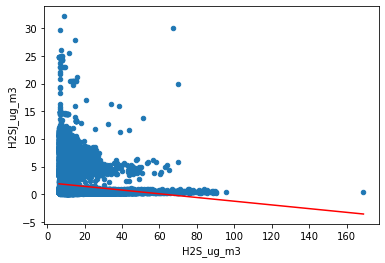

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM14_01486 è  -0.11589078570837154
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM14_01486 è  -0.05214788209965612


In [71]:
# correlazione per la stazione ATM14_01486
pearsonPost4, spearmanPost4= correlation(df_AcidoSolf, 'ATM14_01486', 'H2S_ug_m3', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM14_01486 è ', pearsonPost4)
print('Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM14_01486 è ', spearmanPost4)

In [ ]:
# CORRELAZIONE 2 TRA I SENSORI VOC E PIDVOC NELLE VARIE POSTAZIONI

In [62]:
# Crea un dataframe contenente entrambi i sensori, rinomina le colonne ed elimina i valori nulli
df_SensoriVOC = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'PIDVOC_ppb']]
df_SensoriVOC = df_SensoriVOC.dropna()
df_SensoriVOC

,postazione,Data,VOC_ppm,PIDVOC_ppb
0,ATM05_01479,2021-04-12 00:00:00,0.0,44.5999984741
1,ATM05_01479,2021-04-12 00:05:00,0.0,44.0000000000
2,ATM05_01479,2021-04-12 00:10:00,0.0,44.2000007629
3,ATM05_01479,2021-04-12 00:15:00,0.0,44.4000015259
4,ATM05_01479,2021-04-12 00:20:00,0.0,40.7999992371
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,0.0,352.6000061035
140194,ATM14_01486,2021-11-28 23:40:00,0.0,350.6000061035
140195,ATM14_01486,2021-11-28 23:45:00,0.0,353.0000000000
140196,ATM14_01486,2021-11-28 23:50:00,0.0,352.7999877930


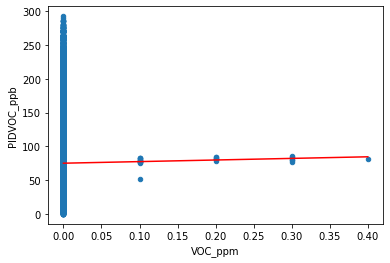

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è  0.002802759904770849
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è  0.019924073582987926


In [63]:
# correlazione per la stazione ATM05_01479
pearsonPost1, spearmanPost1= correlation(df_SensoriVOC, 'ATM05_01479', 'VOC_ppm', 'PIDVOC_ppb' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM05_01479 è ', pearsonPost1)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM05_01479 è ', spearmanPost1)

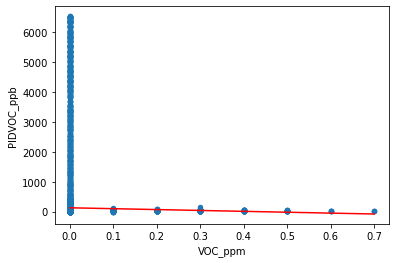

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è  -0.01360985738008193
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è  -0.029252430274637562


In [64]:
# correlazione per la stazione ATM07_01480
pearsonPost2, spearmanPost2 = correlation(df_SensoriVOC, 'ATM07_01480', 'VOC_ppm', 'PIDVOC_ppb' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM07_01480 è ', pearsonPost2)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM07_01480 è ', spearmanPost2)

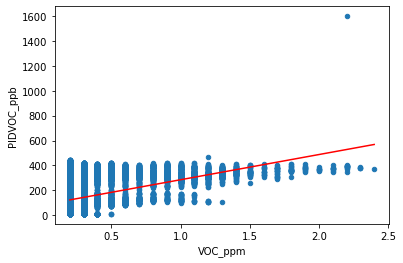

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è  0.34753132766621386
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è  0.1950890328734912


In [65]:
# correlazione per la stazione ATM10_01481
pearsonPost3, spearmanPost3 = correlation(df_SensoriVOC, 'ATM10_01481', 'VOC_ppm', 'PIDVOC_ppb' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM10_01481 è ', pearsonPost3)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM10_01481 è ', spearmanPost3)

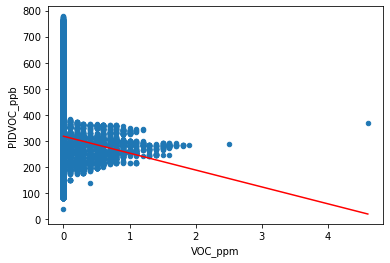

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM14_01486 è  -0.08684644306221975
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM14_01486 è  -0.03032925679018794


In [66]:
# correlazione per la stazione ATM14_01486
pearsonPost4, spearmanPost4= correlation(df_SensoriVOC, 'ATM14_01486', 'VOC_ppm', 'PIDVOC_ppb' )
print('Coefficiente di correlazione tra VOC e PIDVOC con pearson per la postazione ATM14_01486 è ', pearsonPost4)
print('Coefficiente di correlazione tra VOC e PIDVOC con spearman per la postazione ATM14_01486 è ', spearmanPost4)

In [ ]:
# CORRELAZIONE 3 TRA I SENSORI TRS E H2S NELLE VARIE POSTAZIONI

In [84]:
df_SenTRS_H2S = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2S_ug_m3']]
df_SenTRS_H2S = df_SenTRS_H2S.dropna()
df_SenTRS_H2S

,postazione,Data,TRS_ppb,H2S_ug_m3
0,ATM05_01479,2021-04-12 00:00:00,2.0000000000,0.0000000000
1,ATM05_01479,2021-04-12 00:05:00,0.0000000000,0.2000000030
2,ATM05_01479,2021-04-12 00:10:00,0.0000000000,1.7000000477
3,ATM05_01479,2021-04-12 00:15:00,11.8999996185,1.8999999762
4,ATM05_01479,2021-04-12 00:20:00,26.1000003815,2.5000000000
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,0.0000000000,8.8999996185
140194,ATM14_01486,2021-11-28 23:40:00,0.0000000000,8.3000001907
140195,ATM14_01486,2021-11-28 23:45:00,0.0000000000,8.6999998093
140196,ATM14_01486,2021-11-28 23:50:00,0.0000000000,9.1999998093


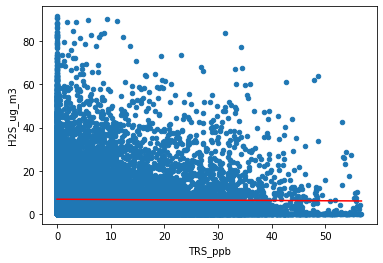

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è  -0.013028664747631756
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è  -0.04929222414161009


In [80]:
# correlazione per la stazione ATM05_01479
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2S, 'ATM05_01479', 'TRS_ppb', 'H2S_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM05_01479 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM05_01479 è ', spearmanPost4)

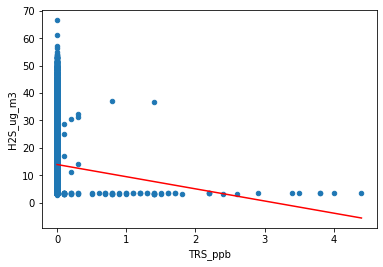

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è  -0.02490068855696131
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è  -0.04232862707203519


In [81]:
# correlazione per la stazione ATM07_01480
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2S, 'ATM07_01480', 'TRS_ppb', 'H2S_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM07_01480 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM07_01480 è ', spearmanPost4)

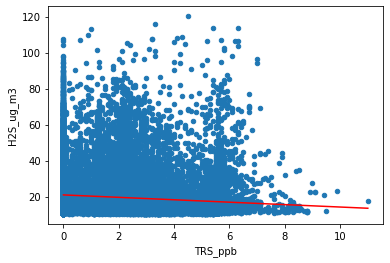

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è  -0.10629043206775543
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è  -0.14545394146491405


In [82]:
# correlazione per la stazione ATM10_01481
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2S, 'ATM10_01481', 'TRS_ppb', 'H2S_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM10_01481 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM10_01481 è ', spearmanPost4)

LinAlgError: SVD did not converge in Linear Least Squares

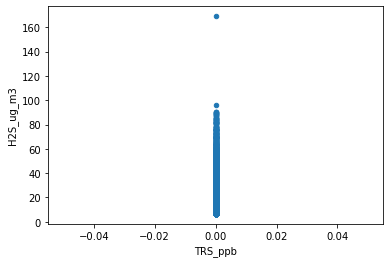

In [86]:
# correlazione per la stazione ATM14_01486
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2S, 'ATM14_01486', 'TRS_ppb', 'H2S_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2S con pearson per la postazione ATM14_01486 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2S con spearman per la postazione ATM14_01486 è ', spearmanPost4)

In [ ]:
# CORRELAZIONE 4 TRA I SENSORI TRS E H2SJ NELLE VARIE POSTAZIONI

In [87]:
df_SenTRS_H2SJ = df_DatiPuliti[['postazione', 'Data', 'TRS_ppb', 'H2SJ_ug_m3']]
df_SenTRS_H2SJ = df_SenTRS_H2SJ.dropna()
df_SenTRS_H2SJ

,postazione,Data,TRS_ppb,H2SJ_ug_m3
0,ATM05_01479,2021-04-12 00:00:00,2.0000000000,0.0000000000
1,ATM05_01479,2021-04-12 00:05:00,0.0000000000,0.0000000000
2,ATM05_01479,2021-04-12 00:10:00,0.0000000000,0.0000000000
3,ATM05_01479,2021-04-12 00:15:00,11.8999996185,0.0000000000
4,ATM05_01479,2021-04-12 00:20:00,26.1000003815,0.0000000000
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,0.0000000000,0.3000000119
140194,ATM14_01486,2021-11-28 23:40:00,0.0000000000,0.3000000119
140195,ATM14_01486,2021-11-28 23:45:00,0.0000000000,0.3000000119
140196,ATM14_01486,2021-11-28 23:50:00,0.0000000000,1.2000000477


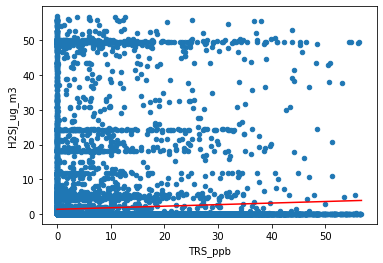

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è  0.05612023202544828
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è  0.045931019468425364


In [92]:
# correlazione per la stazione ATM05_01479
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2SJ, 'ATM05_01479', 'TRS_ppb', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM05_01479 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM05_01479 è ', spearmanPost4)

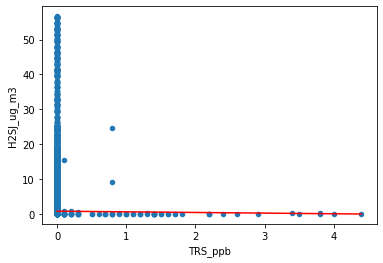

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è  -0.0028539806364508706
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è  -0.01186432651634976


In [93]:
# correlazione per la stazione ATM07_01480
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2SJ, 'ATM07_01480', 'TRS_ppb', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM07_01480 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM07_01480 è ', spearmanPost4)

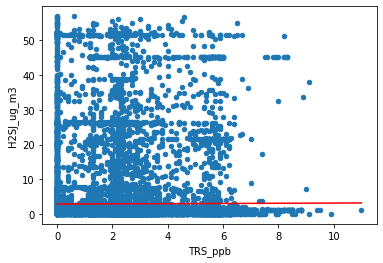

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è  0.007706397882671803
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è  -0.12178441802055145


In [94]:
# correlazione per la stazione ATM10_01481
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2SJ, 'ATM10_01481', 'TRS_ppb', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM10_01481 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM10_01481 è ', spearmanPost4)

C:\Users\Antonio\anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

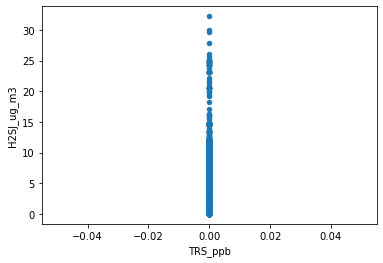

In [95]:
# correlazione per la stazione ATM14_01486
pearsonPost4, spearmanPost4= correlation(df_SenTRS_H2SJ, 'ATM14_01486', 'TRS_ppb', 'H2SJ_ug_m3' )
print('Coefficiente di correlazione tra TRS e H2SJ con pearson per la postazione ATM14_01486 è ', pearsonPost4)
print('Coefficiente di correlazione tra TRS e H2SJ con spearman per la postazione ATM14_01486 è ', spearmanPost4)

In [ ]:
# CORRELAZIONE 5 TRA I SENSORI VOC E C6H6 NELLE VARIE POSTAZIONI

In [74]:
df_SenVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'VOC_ppm', 'C6H6_ug_m3']]
df_SenVOC_C6H6 = df_SenVOC_C6H6.dropna()
df_SenVOC_C6H6

,postazione,Data,VOC_ppm,C6H6_ug_m3
0,ATM05_01479,2021-04-12 00:00:00,0.0,0.3000000119
1,ATM05_01479,2021-04-12 00:05:00,0.0,0.2000000030
2,ATM05_01479,2021-04-12 00:10:00,0.0,0.2000000030
3,ATM05_01479,2021-04-12 00:15:00,0.0,0.2000000030
4,ATM05_01479,2021-04-12 00:20:00,0.0,0.2000000030
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,0.0,0.6000000238
140194,ATM14_01486,2021-11-28 23:40:00,0.0,0.6000000238
140195,ATM14_01486,2021-11-28 23:45:00,0.0,0.6000000238
140196,ATM14_01486,2021-11-28 23:50:00,0.0,0.6000000238


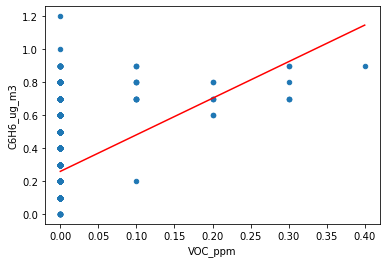

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è  0.11023743060925593
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è  0.04905724751831981


In [75]:
# correlazione per la stazione ATM05_01479
pearsonPost4, spearmanPost4= correlation(df_SenVOC_C6H6, 'ATM05_01479', 'VOC_ppm', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM05_01479 è ', pearsonPost4)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM05_01479 è ', spearmanPost4)

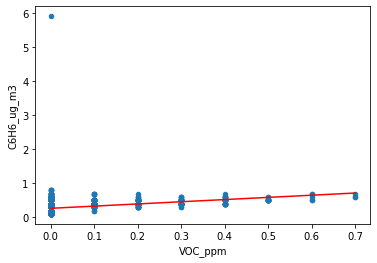

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è  0.1712151818551854
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è  0.14456731322341157


In [76]:
# correlazione per la stazione ATM07_01480
pearsonPost4, spearmanPost4= correlation(df_SenVOC_C6H6, 'ATM07_01480', 'VOC_ppm', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM07_01480 è ', pearsonPost4)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM07_01480 è ', spearmanPost4)

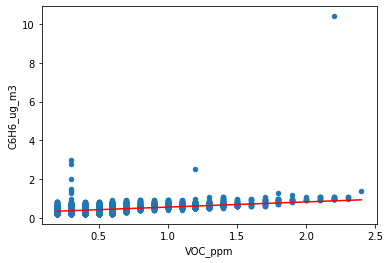

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è  0.43758613936919916
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è  -0.002849972879777744


In [77]:
# correlazione per la stazione ATM10_01481
pearsonPost4, spearmanPost4= correlation(df_SenVOC_C6H6, 'ATM10_01481', 'VOC_ppm', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM10_01481 è ', pearsonPost4)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM10_01481 è ', spearmanPost4)

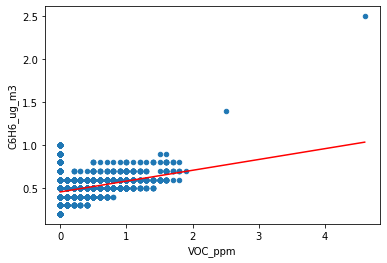

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM14_01486 è  0.14214224807356757
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM14_01486 è  0.1264743339904002


In [78]:
# correlazione per la stazione ATM14_01486
pearsonPost4, spearmanPost4= correlation(df_SenVOC_C6H6, 'ATM14_01486', 'VOC_ppm', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra VOC e C6H6 con pearson per la postazione ATM14_01486 è ', pearsonPost4)
print('Coefficiente di correlazione tra VOC e C6H6 con spearman per la postazione ATM14_01486 è ', spearmanPost4)

In [ ]:
# CORRELAZIONE 6 TRA I SENSORI PIDVOC E C6H6 NELLE VARIE POSTAZIONI

In [96]:
df_SenPIDVOC_C6H6 = df_DatiPuliti[['postazione', 'Data', 'PIDVOC_ppb', 'C6H6_ug_m3']]
df_SenPIDVOC_C6H6 = df_SenPIDVOC_C6H6.dropna()
df_SenPIDVOC_C6H6

,postazione,Data,PIDVOC_ppb,C6H6_ug_m3
0,ATM05_01479,2021-04-12 00:00:00,44.5999984741,0.3000000119
1,ATM05_01479,2021-04-12 00:05:00,44.0000000000,0.2000000030
2,ATM05_01479,2021-04-12 00:10:00,44.2000007629,0.2000000030
3,ATM05_01479,2021-04-12 00:15:00,44.4000015259,0.2000000030
4,ATM05_01479,2021-04-12 00:20:00,40.7999992371,0.2000000030
...,...,...,...,...
140193,ATM14_01486,2021-11-28 23:35:00,352.6000061035,0.6000000238
140194,ATM14_01486,2021-11-28 23:40:00,350.6000061035,0.6000000238
140195,ATM14_01486,2021-11-28 23:45:00,353.0000000000,0.6000000238
140196,ATM14_01486,2021-11-28 23:50:00,352.7999877930,0.6000000238


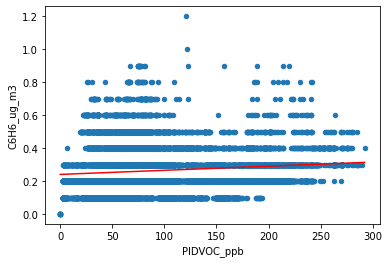

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM05_01479 è  0.10441473692213753
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM05_01479 è  0.17363200281853491


In [97]:
# correlazione per la stazione ATM05_01479
pearsonPost4, spearmanPost4= correlation(df_SenPIDVOC_C6H6, 'ATM05_01479', 'PIDVOC_ppb', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM05_01479 è ', pearsonPost4)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM05_01479 è ', spearmanPost4)

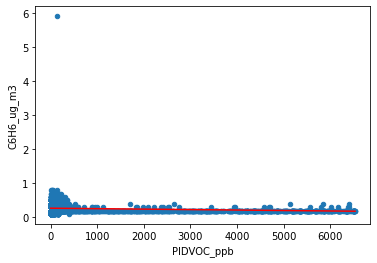

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM07_01480 è  -0.07893927831700971
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM07_01480 è  -0.01111394593546374


In [98]:
# correlazione per la stazione ATM07_01480
pearsonPost4, spearmanPost4= correlation(df_SenPIDVOC_C6H6, 'ATM07_01480', 'PIDVOC_ppb', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM07_01480 è ', pearsonPost4)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM07_01480 è ', spearmanPost4)

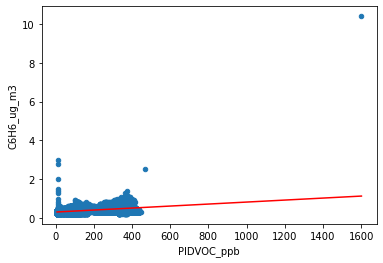

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM10_01481 è  0.4919979185721272
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM10_01481 è  0.5357929673911618


In [99]:
# correlazione per la stazione ATM10_01481
pearsonPost4, spearmanPost4= correlation(df_SenPIDVOC_C6H6, 'ATM10_01481', 'PIDVOC_ppb', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM10_01481 è ', pearsonPost4)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM10_01481 è ', spearmanPost4)

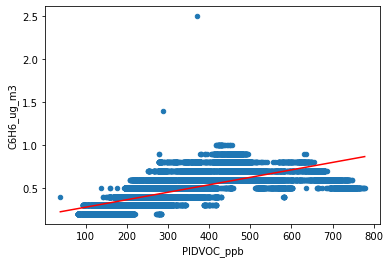

Coefficiente di correlazione tra H2S e H2SJ con pearson per la postazione ATM14_01486 è  0.7322690887945411
Coefficiente di correlazione tra H2S e H2SJ con spearman per la postazione ATM14_01486 è  0.8468934054603997


In [100]:
# correlazione per la stazione ATM14_01486
pearsonPost4, spearmanPost4= correlation(df_SenPIDVOC_C6H6, 'ATM14_01486', 'PIDVOC_ppb', 'C6H6_ug_m3' )
print('Coefficiente di correlazione tra PIDVOC e C6H6 con pearson per la postazione ATM14_01486 è ', pearsonPost4)
print('Coefficiente di correlazione tra PIDVOC e C6H6 con spearman per la postazione ATM14_01486 è ', spearmanPost4)